# Example for Linear Regression
- story (Procedure of applied ML)
    - Preparation
        - Make the purpose (goal) clear.
        - Make the task concrete.
        - Check the possibilities to replace the existing services.
    - Prepare the dataset
    - Select a model
    - Continue learning, evaluation and tuning
- ref.
    - [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [1]:
# Prepare the dataset
# Load the diabetes dataset
# ref. https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

from sklearn import datasets
diabetes = datasets.load_diabetes()

orig_X = diabetes.data # get a feature matrix (input dataset)
print(type(orig_X))    # check the type
print(orig_X.shape)    # check the size of feature matrix
print(orig_X[:5])      # display the first 5 samples
print(diabetes.feature_names)    # display the name of each element of feature

<class 'numpy.ndarray'>
(442, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [2]:
# convert np.ndarray to pd.dataframe for readability

import pandas as pd
df = pd.DataFrame(orig_X, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
# Here, use just one feature 'bmi' for simple exercise
import numpy as np
X = diabetes.data[:, np.newaxis, 2]
print(X.shape)
print(X[:5])

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [4]:
y = diabetes.target
print(y.shape)
print(y[:5])

(442,)
[151.  75. 141. 206. 135.]


In [5]:
# split the dataset into training and testing set
num_of_training = 400

X_train = X[:num_of_training]
X_test = X[num_of_training:]

y_train = y[:num_of_training]
y_test = y[num_of_training:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 1)
(42, 1)
(400,)
(42,)


In [6]:
# Select a model
# => Linear Regression

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train, y_train)

# Make predictions using the testing set
predicted = regr.predict(X_test)

# Check the predictions vs true answer
print(np.c_[predicted, y_test])

[[196.51241167 175.        ]
 [109.98667708  93.        ]
 [121.31742804 168.        ]
 [245.95568858 275.        ]
 [204.75295782 293.        ]
 [270.67732703 281.        ]
 [ 75.99442421  72.        ]
 [241.8354155  140.        ]
 [104.83633574 189.        ]
 [141.91879342 181.        ]
 [126.46776938 209.        ]
 [208.8732309  136.        ]
 [234.62493762 261.        ]
 [152.21947611 113.        ]
 [159.42995399 131.        ]
 [161.49009053 174.        ]
 [229.47459628 257.        ]
 [221.23405012  55.        ]
 [129.55797419  84.        ]
 [100.71606266  42.        ]
 [118.22722323 146.        ]
 [168.70056841 212.        ]
 [227.41445974 233.        ]
 [115.13701842  91.        ]
 [163.55022706 111.        ]
 [114.10695016 152.        ]
 [120.28735977 120.        ]
 [158.39988572  67.        ]
 [237.71514243 310.        ]
 [121.31742804  94.        ]
 [ 98.65592612 183.        ]
 [123.37756458  66.        ]
 [205.78302609 173.        ]
 [ 95.56572131  72.        ]
 [154.27961264

In [7]:
# Check the differences (errors)
print(y_test - predicted)

[ -21.51241167  -16.98667708   46.68257196   29.04431142   88.24704218
   10.32267297   -3.99442421 -101.8354155    84.16366426   39.08120658
   82.53223062  -72.8732309    26.37506238  -39.21947611  -28.42995399
   12.50990947   27.52540372 -166.23405012  -45.55797419  -58.71606266
   27.77277677   43.29943159    5.58554026  -24.13701842  -52.55022706
   37.89304984   -0.28735977  -91.39988572   72.28485757  -27.31742804
   84.34407388  -57.37756458  -32.78302609  -23.56572131 -105.27961264
  -66.58804246  -34.17483382    6.20922678  -33.79852034   -5.79852034
   29.66799794  -26.20490209]


In [8]:
# Check the sum of absolute error
print(sum(np.abs(y_test - predicted)))

# MAE (Mean Absolute Error)
print(sum(np.abs(y_test - predicted)) / len(X_test))

1890.1633693291935
45.00388974593318


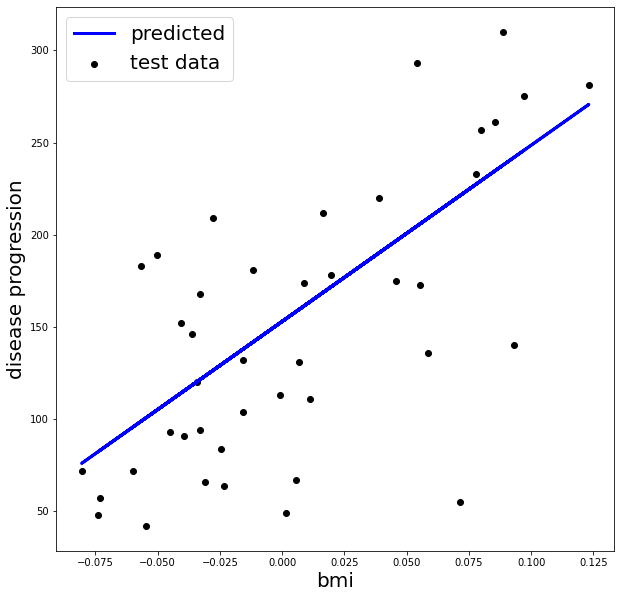

In [9]:
# Plot testing set and predictions
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X_test, y_test,  color='black', label='test data')
ax.plot(X_test, predicted, color='blue', linewidth=3, label='predicted')
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('bmi', fontsize=20)
ax.set_ylabel('disease progression', fontsize=20)
plt.show()


In [10]:
# Check the model (obtained parameters)
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficients:  [955.70303385]
intercept:  153.00018395675963
